 Problem Statement
 
 The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

 Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

 Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 


 Data Dictionary
 We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.



 Train file: CSV containing the item outlet information with sales value

 Test file: CSV containing item outlet combinations for which sales need to be forecasted

In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# VariableﾠDescription
# Item_IdentifierﾠUnique product ID
# Item_WeightﾠWeight of product
# Item_Fat_ContentﾠWhether the product is low fat or not
# Item_VisibilityﾠThe % of total display area of all products in a store allocated to the particular product
# Item_TypeﾠThe category to which the product belongs
# Item_MRPﾠMaximum Retail Price (list price) of the product
# Outlet_IdentifierﾠUnique store ID
# Outlet_Establishment_YearﾠThe year in which store was established
# Outlet_SizeﾠThe size of the store in terms of ground area covered
# Outlet_Location_TypeﾠThe type of city in which the store is located
# Outlet_TypeﾠWhether the outlet is just a grocery store or some sort of supermarket
# Item_Outlet_SalesﾠSales of the product in the particular store. This is the outcome variable to be predicted.

In [3]:

train=pd.read_csv(r"C:\Users\Admin\Downloads\train_v9rqX0R.csv")
test=pd.read_csv(r"C:\Users\Admin\Downloads\test_AbJTz2l.csv")

In [4]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.shape, test.shape

((8523, 12), (5681, 11))

univariate Analysis

$ numerical_variables:Distplot

$ Categorical_variables:Count_plot

1.Numerical variables

In [7]:
# Approach:
# create a list of numerical andcategorical column and plot it in one go


In [8]:
##combining the data
combined=pd.concat([train,test],ignore_index=True)
combined.shape

(14204, 12)

In [9]:
combined.isnull().sum()
## item_weight and outlet_size have missing values


Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [10]:
##creating a list of numerical columns
combined.select_dtypes(include=np.number).columns
num_columns=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']   ##outlet_establishment year is a categorical column 

C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\1425983110.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.loc[:,i],color="magenta")
C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\1425983110.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(combined.loc[:,i],color="magenta")


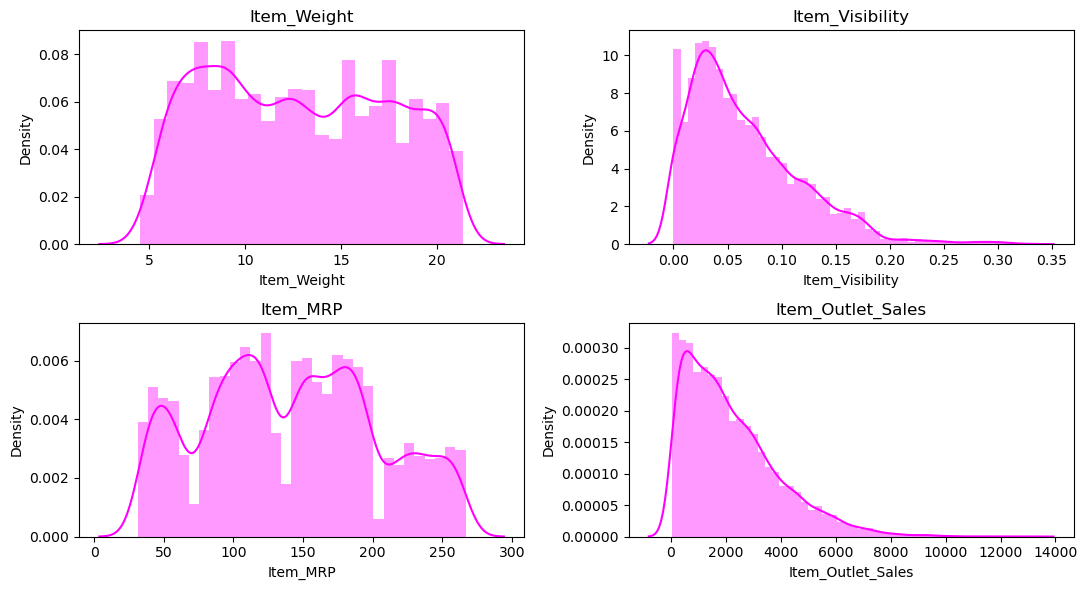

In [11]:
# plot aesthitics
nrows=2
ncols=2
iterator=1

plt.figure(figsize=(11,6))
for i in num_columns:
    plt.subplot(nrows,ncols,iterator)
    sns.distplot(combined.loc[:,i],color="magenta")
    plt.title(i)
    iterator+=1                        ## helps in printing the plots

plt.tight_layout()            ## for clean layout
plt.show()



In [12]:
combined.Item_Weight.describe()  

count    11765.000000
mean        12.792854
std          4.652502
min          4.555000
25%          8.710000
50%         12.600000
75%         16.750000
max         21.350000
Name: Item_Weight, dtype: float64

 Inferences of numerical variables

In [13]:

# item_weight is approximately normal
# MRP is multimodal                                      
#Item outlet sales and visibility is highly skewed

Categorical variables

In [14]:
combined.select_dtypes(include="object").columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [15]:
cat_cols=[ 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']     ## removes the Item_identifier

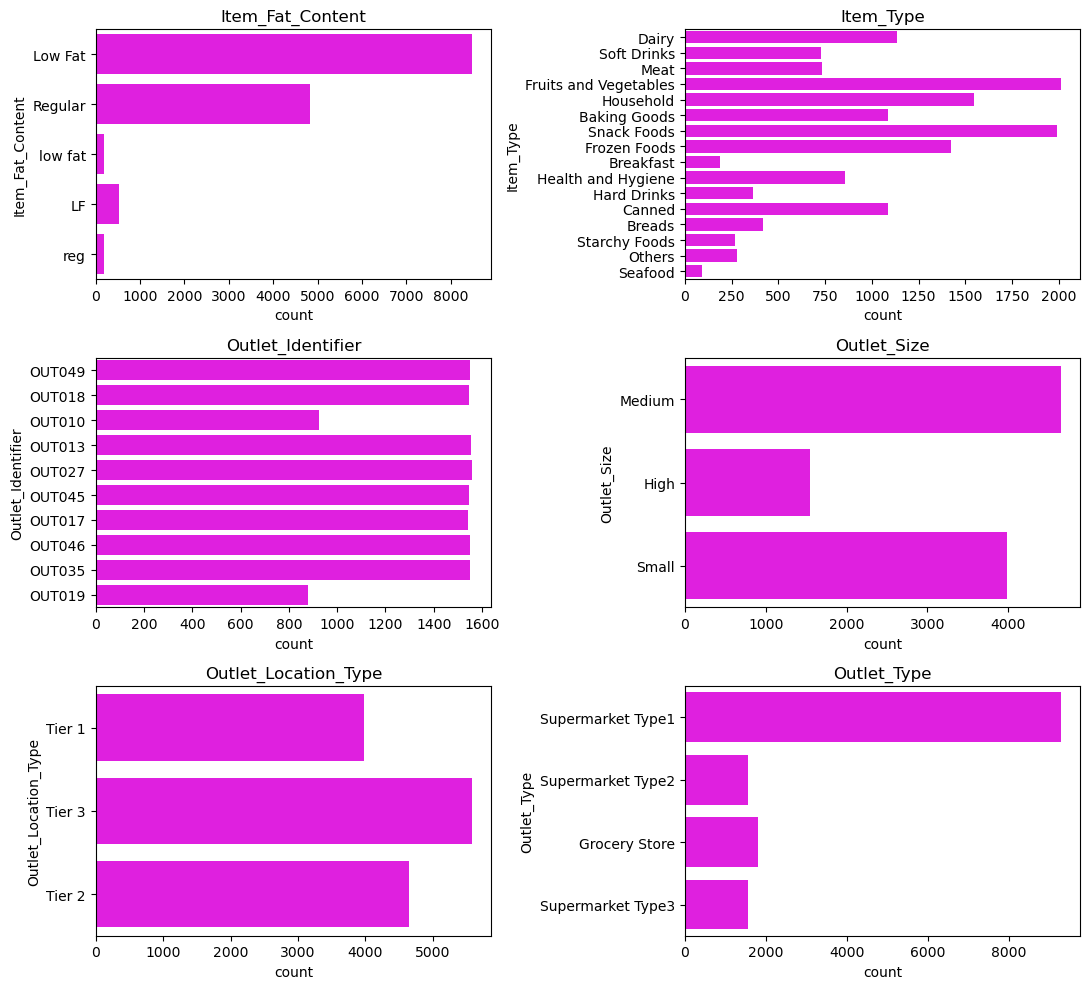

In [16]:
#total 6 plots
nrows=3
ncols=2
iterator=1

plt.figure(figsize=(11,10))
for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.countplot(combined.loc[:,i],color="magenta")
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

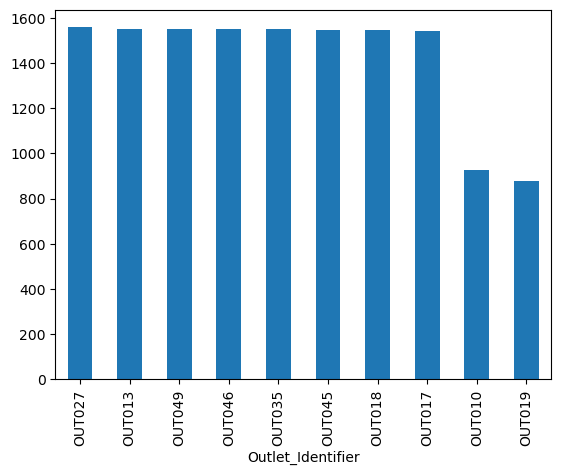

In [17]:
combined.Outlet_Identifier.value_counts().plot(kind="bar")    ## individually taken to get better visualization

plt.show()

Inferences of categorical variables

In [18]:
## Top 5 selling items: Fruits& veggies,Frozen Food,Diary,Snacks& Households
# fat content:most food items have low fat content
# outlet 27,13 and 49 has the highest sales  outlet 10 and 19 has the lowest sales
# Most of the outlet size are medium and least number of high size outlets
# Most of the oulets are in tier 3 cities
# Most of the outlets are Supermarket_type1 and least ones are Supermarket_type 3

Summary of univariate analysis

In [19]:
## Top 5 selling items: Fruits& veggies,Frozen Food,Diary,Snacks& Households
# Top 3 outlets: out27,out13 & out49
# Sales and visibility is skewed
# Weight is normally distributed and MRP is multimodal data
#Most of the Outlets in tier 3 cities and mostlt supermarket_type1
# outlets are medium sized and most products are low fat products

Bivariate Analysis

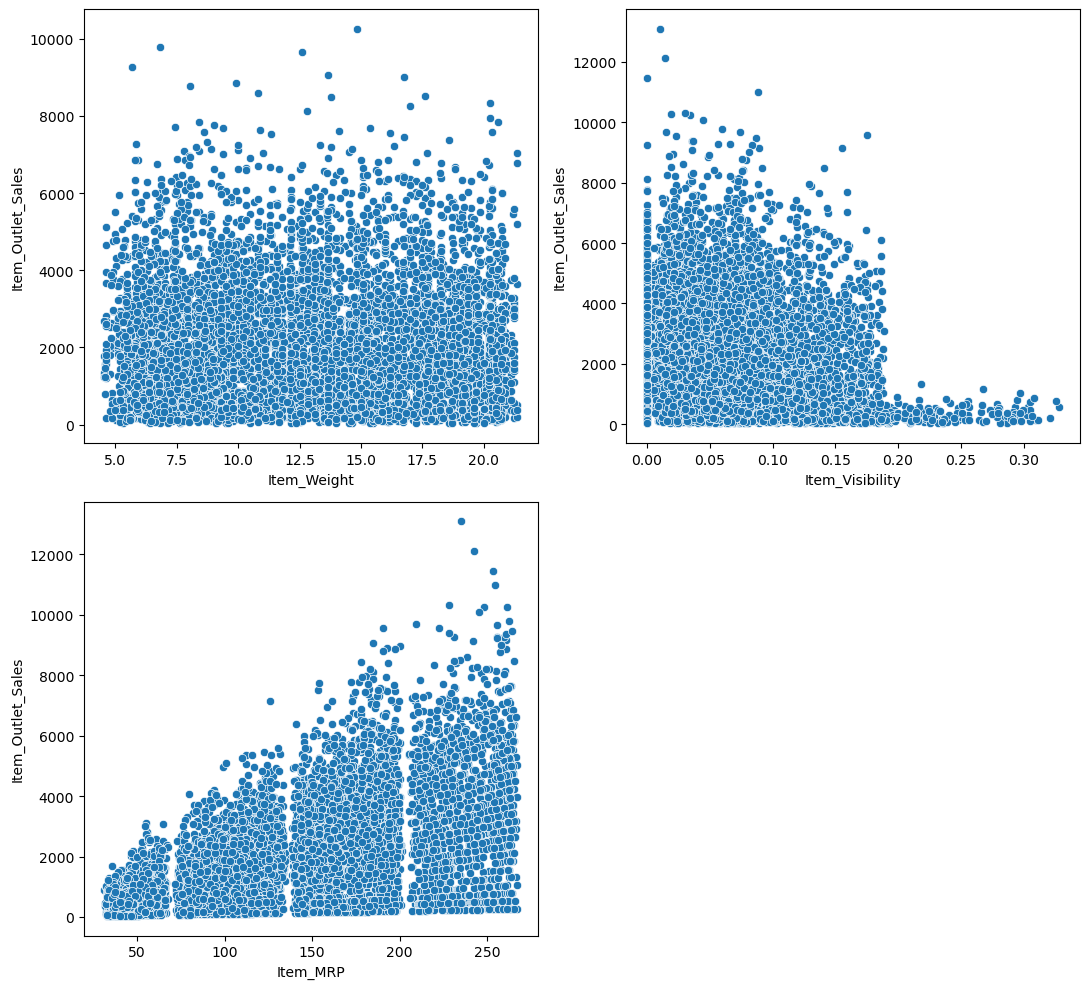

In [20]:
num_columns_1=['Item_Weight','Item_Visibility','Item_MRP']    ## removing item outlet sales
nrows=2
ncols=2
iterator=1

plt.figure(figsize=(11,10))

for i in num_columns_1:
    plt.subplot(nrows,ncols,iterator)
    sns.scatterplot(x=i,y="Item_Outlet_Sales",data=combined)

    iterator+=1
plt.tight_layout()
plt.show()

In [21]:
## In item_MRP vs output_sales  MRP increses here sales also increasing and it is not the case in real world 
# #it is happening because the data is multimodal

boxplot vs sales

ValueError: num must be an integer with 1 <= num <= 4, not 5

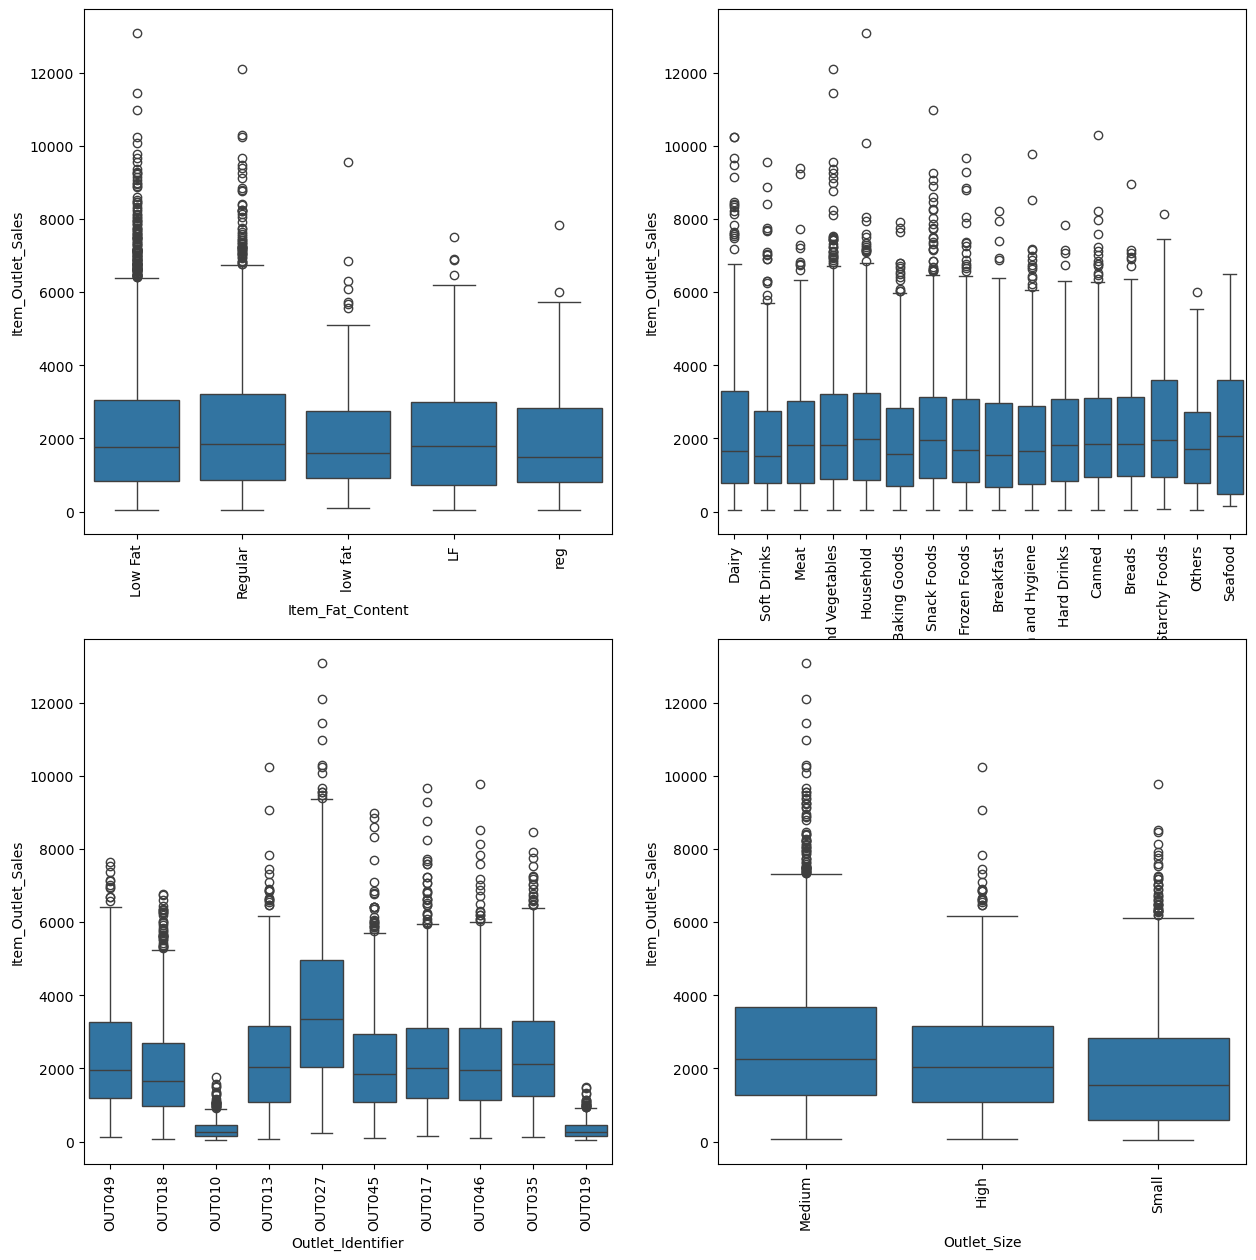

In [22]:
nrows=2
ncols=2
iterator=1

plt.figure(figsize=(15,15))

for i in cat_cols:
    plt.subplot(nrows,ncols,iterator)
    sns.boxplot(x=i,y="Item_Outlet_Sales",data=combined)
    plt.xticks(rotation=90)

    iterator+=1
plt.tight_layout()
plt.show()

In [ ]:
##inference from item_fat_content vs item_outlet_sales
## regular has the highest sales, and highest median,lowfat has the highest outliers

# Item_outlet_sales vs Item_type
# starchy food has the highest sales,snack food has the hisghest outliers,seafood has the highest median

#outlet_identifier vs item_oulet_sales
#outlet 27 has the highest sales also have the highest median,out10 and 19 has the lowest sales,out18 has the largest outliers

# outlet_size vs item_outlet_sales
# medium outlets has the highest number of outliers as well as the highest sales



Treating missing values

In [ ]:
combined.isnull().sum()[combined.isnull().sum()!=0]    ## gives only the misssing values


Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

1.Item fat_content

In [ ]:
## fixing the item_fat_content
combined.Item_Fat_Content.unique()  ## need to replace with only low fat and regular

combined.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'],value=['Low Fat', 'Low fat','Regular'],inplace=True)
combined.Item_Fat_Content.unique()


C:\Users\Admin\AppData\Local\Temp\ipykernel_14756\783728164.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined.Item_Fat_Content.replace(to_replace=['low fat', 'LF', 'reg'],value=['Low Fat', 'Low fat','Regular'],inplace=True)


array(['Low Fat', 'Regular', 'Low fat'], dtype=object)

In [ ]:
combined.Item_Fat_Content.replace(to_replace=['Low fat'],value=['Low Fat'],inplace=True)

2.Item_weight

In [ ]:
## look into the pattern for Item_Weight ~ which actegorical column should be used to impute the missing values in weight

combined.loc[combined.Item_Weight.isnull(),:].head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


In [ ]:
combined.loc[combined.Item_Identifier=="FDF09","Item_Weight"]     ## pattern:same item identifier have same weight indicates that products have standardised packaging and label

62         NaN
2191     6.215
3469     6.215
4698     6.215
4959     6.215
5976     6.215
9700     6.215
10156    6.215
12840    6.215
Name: Item_Weight, dtype: float64

In [ ]:
## loops for dealing with missing values
combined.loc[combined.Item_Weight.isnull(),:].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432


In [ ]:
## take the first two rows for bulding the loop
combined.loc[7,"Item_Weight"]=combined.loc[combined.Item_Identifier=="FDP10","Item_Weight"].median()
combined.loc[18,"Item_Weight"]=combined.loc[combined.Item_Identifier=="DRI11","Item_Weight"].median()

In [ ]:
# running loop on index numbers
rownums=combined.loc[combined.Item_Weight.isnull(),:].index   ## will give list of all row number where item_weight is null
itemids=combined.loc[combined.Item_Weight.isnull(),"Item_Identifier"]

In [ ]:
for i in rownums:
    combined.loc[i,"Item_Weight"]=combined.loc[combined.Item_Identifier==itemids[i],"Item_Weight"].median()
 

 


In [ ]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

3.Item_visibility

In [ ]:
## treating item visibility
# using item identifier we will remove item_visibility zeros   #lambda approach

combined["Item_Visibility"]=combined.groupby("Item_Identifier")["Item_Visibility"].transform(lambda x:x.replace(to_replace=0,value=x.median()))

In [ ]:
# still there is zero values for item visibility in "fruits and vagetables in item type

median_val=combined.loc[combined.Item_Type=="Fruits and vegetables","Item_Visibility"].median()     # showing some error by not getting median and median is showing as nan 
median_val   

combined.loc[combined.Item_Visibility==0,"Item_Visibility"]=0.58  

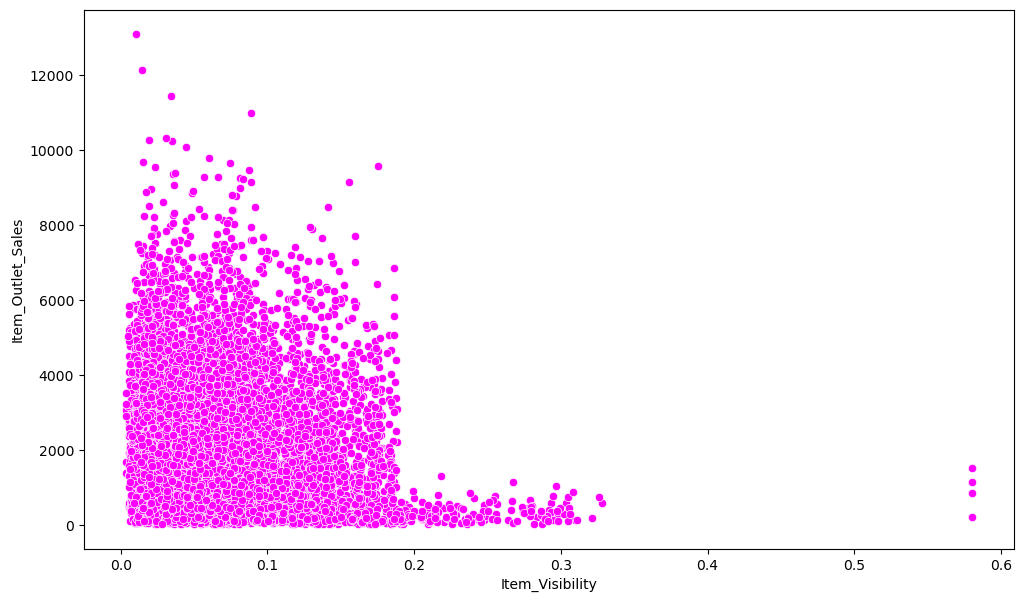

In [ ]:
## checking whethere there is still zero values in item visibility

plt.figure(figsize=(12,7))
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=combined,color="magenta")
plt.show()

## there is still zero values

4.Outlet_Size

In [ ]:
combined["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
combined.loc[combined.Outlet_Size=="Medium","Outlet_Identifier"].unique()

array(['OUT049', 'OUT018', 'OUT027'], dtype=object)

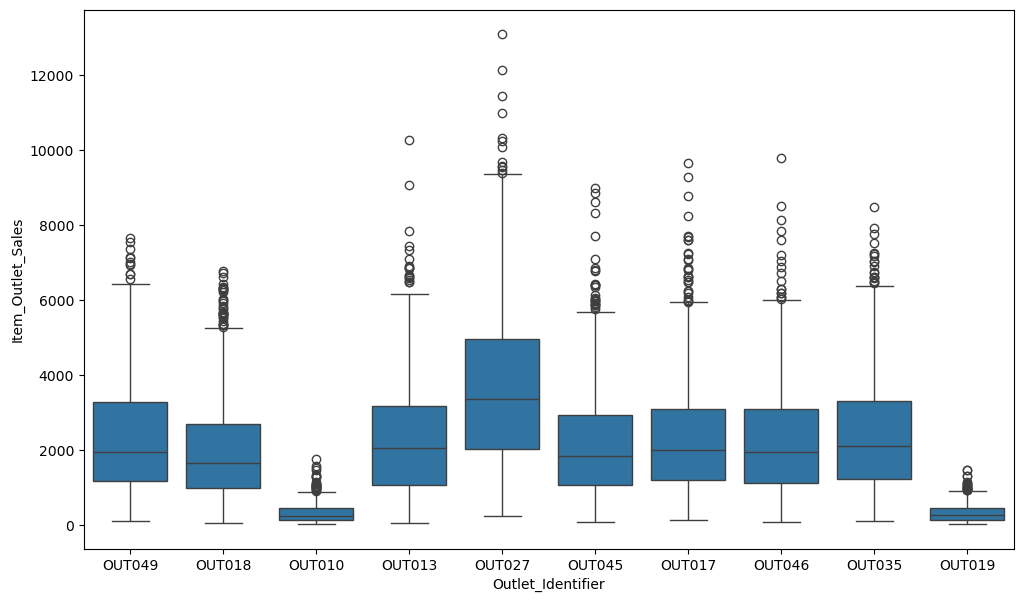

In [ ]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=combined)
plt.show()

In [ ]:
combined.loc[combined.Outlet_Size.isnull(),"Outlet_Identifier"].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

In [ ]:
combined.loc[combined.Outlet_Size.isnull(),"Outlet_Type"].unique()

array(['Grocery Store', 'Supermarket Type1'], dtype=object)

In [ ]:
#Generating a truth table
combined.groupby(["Outlet_Identifier","Outlet_Location_Type","Outlet_Type"])["Outlet_Size"].describe()

,,,count,unique,top,freq
Outlet_Identifier,Outlet_Location_Type,Outlet_Type,,,,
OUT010,Tier 3,Grocery Store,0,0,NaN,NaN
OUT013,Tier 3,Supermarket Type1,1553,1,High,1553
OUT017,Tier 2,Supermarket Type1,0,0,NaN,NaN
OUT018,Tier 3,Supermarket Type2,1546,1,Medium,1546
OUT019,Tier 1,Grocery Store,880,1,Small,880
OUT027,Tier 3,Supermarket Type3,1559,1,Medium,1559
OUT035,Tier 2,Supermarket Type1,1550,1,Small,1550
OUT045,Tier 2,Supermarket Type1,0,0,NaN,NaN
OUT046,Tier 1,Supermarket Type1,1550,1,Small,1550


In [ ]:
## for grocery store
## grocery stores are generally small therefore imputing the grocery store outlet size with "small"


combined.loc[combined.Outlet_Type == "Grocery Store", "Outlet_Size"] =\
      combined.loc[combined.Outlet_Type == "Grocery Store", "Outlet_Size"].replace(to_replace=np.nan, value="Small")


In [ ]:
# for supermarket type_1
combined.loc[combined.Outlet_Size.isnull(),"Outlet_Identifier"].unique()
## for supermarket_type1 its outlet 45 and 17

combined.loc[combined.Outlet_Size.isnull(),"Outlet_Location_Type"].unique()
# for supermarket _type1 location is tier2
## tier 2 outlet_Size is small therefore imputing the outletsize as small
#  

array(['Tier 2'], dtype=object)

In [ ]:
# imputted outlet_size where where type supermarket_type1 in tier2 city
combined.loc[combined.Outlet_Type=="Supermarket Type1","Outlet_Size"]="Small"

In [ ]:
combined.isnull().sum()[combined.isnull().sum()!=0]

Item_Outlet_Sales    5681
dtype: int64

Feature Engineering

In [ ]:
combined.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022914,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.013177,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


Feature 1: Extracting food code from from the item_identifier

In [ ]:
## Extracting food code from from the item_identifier
ids=[]
combined.Item_Identifier[0][:2]  ## logic

'FD'

In [ ]:
## writing the loop
ids=[]
for i in combined.Item_Identifier:
    ids.append(i[:2])




In [ ]:
## creating a feature
combined["Item_ID"]=pd.Series(ids)

In [ ]:
combined.Item_ID.unique()

array(['FD', 'DR', 'NC'], dtype=object)

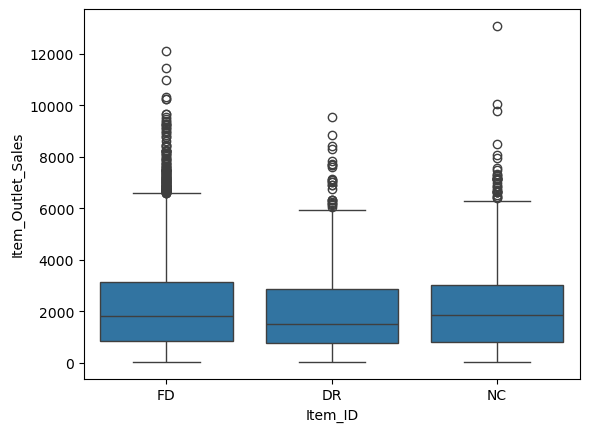

In [ ]:
sns.boxplot(x="Item_ID",y="Item_Outlet_Sales",data=combined)
plt.show()

# non consumables sells the mostfollowed by food and drinks

Feature 2

In [ ]:
combined.groupby("Item_ID")["Item_Fat_Content"].describe()
## non consumable is showing low fat which is false

,count,unique,top,freq
Item_ID,,,,
DR,1317,3,Low Fat,1146
FD,10201,3,Low Fat,4986
NC,2686,2,Low Fat,2531


In [ ]:
# :where the item Id is NC,Item_fat_content=non edible and where its drinks item_fat_content is low_kcal
combined.loc[combined.Item_ID=="NC","Item_Fat_Content"]="Non_Edible"
combined.loc[combined.Item_ID=="DR","Item_Fat_Content"]="Low_Kcal"

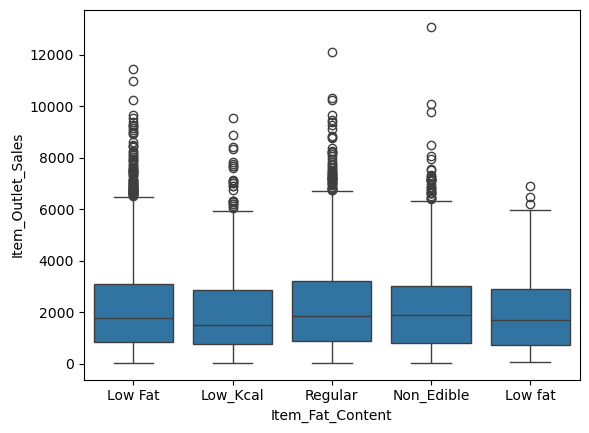

In [ ]:
sns.boxplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=combined)
plt.show()

Feature 3

In [ ]:
combined.Item_Type.unique()
## here we are having 16 items and it is not a ordinal data 

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [30]:
## we bin the data into two categoreis  perishable and nonperishable
perishable=['Dairy', 'Meat', 'Fruits and Vegetables',
       'Breakfast','Breads', 'Starchy Foods', 'Seafood']

def perish(i):
    if i in perishable:
        return "perishables"
    else:
        return "Non Perishables"

In [31]:
combined["Item_Type_Cat"]=combined.Item_Type.apply(perish)

In [32]:
## statistical summary of all the Item types
combined.groupby("Item_Type")["Item_Outlet_Sales"].describe()

,count,mean,std,min,25%,50%,75%,max
Item_Type,,,,,,,,
Baking Goods,648.0,1952.971207,1546.788045,37.2848,705.08220,1577.9460,2823.82425,7931.6754
Breads,251.0,2204.132226,1644.235914,35.2874,968.73900,1860.2452,3145.90500,8958.3390
Breakfast,110.0,2111.808651,1911.693586,39.9480,679.11600,1554.6430,2970.30025,8209.3140
Canned,649.0,2225.194904,1645.235638,37.9506,952.09400,1860.2452,3101.29640,10306.5840
Dairy,682.0,2232.542597,1884.404698,40.6138,788.97300,1650.8511,3296.20935,10256.6490
Frozen Foods,856.0,2132.867744,1724.777720,36.6190,808.94700,1687.1372,3079.49145,9678.0688
Fruits and Vegetables,1232.0,2289.009592,1799.503459,45.2744,884.84820,1830.9500,3227.13260,12117.5600
Hard Drinks,214.0,2139.221622,1606.191587,37.9506,834.91320,1816.6353,3071.33540,7843.1240
Health and Hygiene,520.0,2010.000265,1553.633063,34.6216,758.84555,1669.4935,2884.57850,9779.9362


In [33]:
# Target encoding for item_type
combined["item_cnt"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("count")
combined["item_mean"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("mean")
combined["item_std"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("std")
combined["item_max"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("max")
combined["item_min"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("min")



In [34]:
combined["item_median"]=combined.groupby("Item_Type")["Item_Outlet_Sales"].transform("median")


In [35]:
combined.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_id,Item_Type_Cat,item_cnt,item_mean,item_std,item_max,item_min,item_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Average,perishables,682,2232.542597,1884.404698,10256.6490,40.6138,1650.8511
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Average,Non Perishables,445,2006.511735,1674.249752,9554.2300,33.2900,1518.0240
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Average,perishables,425,2158.977911,1695.231081,9390.4432,47.9376,1829.6184
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Worst,perishables,1232,2289.009592,1799.503459,12117.5600,45.2744,1830.9500
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Best,Non Perishables,910,2258.784300,1692.245757,13086.9648,33.2900,1981.4208


In [36]:
#Target encoding for item_identifier
combined["identifier_cnt"]=combined.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("count")
combined["identifier_mean"]=combined.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("mean")
combined["identifier_std"]=combined.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("std")
combined["identifier_max"]=combined.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("max")
combined["identifier_min"]=combined.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("min")
combined["identifier_median"]=combined.groupby("Item_Identifier")["Item_Outlet_Sales"].transform("median")


In [37]:
pd.set_option("display.max_columns",100)
combined.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_id,Item_Type_Cat,item_cnt,item_mean,item_std,item_max,item_min,item_median,identifier_cnt,identifier_mean,identifier_std,identifier_max,identifier_min,identifier_median
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,Average,perishables,682,2232.542597,1884.404698,10256.6490,40.6138,1650.8511,8,5198.067050,2102.142939,6474.2392,498.0184,5976.2208
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,Average,Non Perishables,445,2006.511735,1674.249752,9554.2300,33.2900,1518.0240,6,862.211000,416.608888,1478.0760,443.4228,812.9418
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,Average,perishables,425,2158.977911,1695.231081,9390.4432,47.9376,1829.6184,7,1478.076000,1123.940607,2936.1780,139.8180,1957.4520
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,Worst,perishables,1232,2289.009592,1799.503459,12117.5600,45.2744,1830.9500,6,3021.067500,1412.326043,4577.3750,732.3800,3204.1625
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,Best,Non Perishables,910,2258.784300,1692.245757,13086.9648,33.2900,1981.4208,6,653.926567,311.463892,994.7052,276.3070,690.7675


In [38]:
combined.Outlet_Identifier.unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [39]:
best=['OUT046','OUT027','OUT013']
worst=['OUT010','OUT019']

def outlets(i):
    if i in best:
        return ("Best")
    elif i in worst:
        return ("Worst")
    else:
        return("Average")


In [28]:
combined["Outlet_id"]=combined.Outlet_Identifier.apply(outlets)

In [29]:
combined.Outlet_id.unique()

array(['Average', 'Worst', 'Best'], dtype=object)

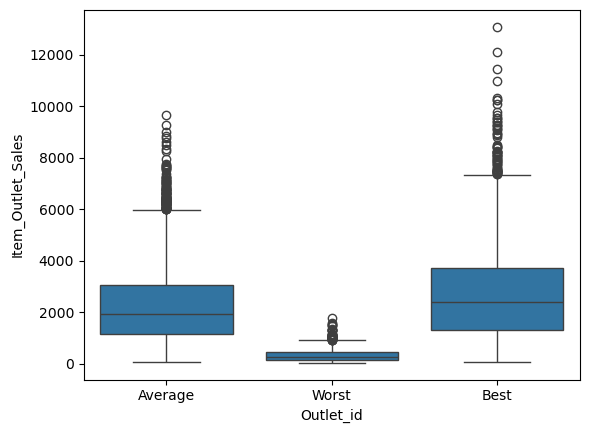

In [41]:
sns.boxplot(x="Outlet_id",y="Item_Outlet_Sales",data=combined)
plt.show()

Dropping the columns

In [43]:
combined.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Outlet_id', 'Item_Type_Cat',
       'item_cnt', 'item_mean', 'item_std', 'item_max', 'item_min',
       'item_median', 'identifier_cnt', 'identifier_mean', 'identifier_std',
       'identifier_max', 'identifier_min', 'identifier_median'],
      dtype='object')

In [44]:
#  will drop the columns from were we extracted new features and columns that does not have any relevant pattern
# will drop Item_Identifier,'Item_Type','Outlet_Identifier',Outlet_Establishment_Year',

new_data=combined.drop(['Item_Identifier','Item_Type','Outlet_Identifier','Outlet_Establishment_Year'],axis=1)

In [45]:
new_data.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_id,Item_Type_Cat,item_cnt,item_mean,item_std,item_max,item_min,item_median,identifier_cnt,identifier_mean,identifier_std,identifier_max,identifier_min,identifier_median
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,Average,perishables,682,2232.542597,1884.404698,10256.6490,40.6138,1650.8511,8,5198.067050,2102.142939,6474.2392,498.0184,5976.2208
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,Average,Non Perishables,445,2006.511735,1674.249752,9554.2300,33.2900,1518.0240,6,862.211000,416.608888,1478.0760,443.4228,812.9418
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,Average,perishables,425,2158.977911,1695.231081,9390.4432,47.9376,1829.6184,7,1478.076000,1123.940607,2936.1780,139.8180,1957.4520
3,19.20,Regular,0.000000,182.0950,NaN,Tier 3,Grocery Store,732.3800,Worst,perishables,1232,2289.009592,1799.503459,12117.5600,45.2744,1830.9500,6,3021.067500,1412.326043,4577.3750,732.3800,3204.1625
4,8.93,Low Fat,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,Best,Non Perishables,910,2258.784300,1692.245757,13086.9648,33.2900,1981.4208,6,653.926567,311.463892,994.7052,276.3070,690.7675


split the data into train and test


In [54]:
train.shape,test.shape

((8523, 12), (5681, 11))

In [56]:
train.shape,test.shape
 
New_train=new_data.loc[0:train.shape[0]-1,:]
New_test=new_data.loc[train.shape[0]:,:]

## removing target variable from new_test
New_test.drop("Item_Outlet_Sales",axis=1,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15508\2268458523.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  New_test.drop("Item_Outlet_Sales",axis=1,inplace=True)


In [57]:
train.shape,test.shape,New_train.shape,New_test.shape


((8523, 12), (5681, 11), (8523, 22), (5681, 21))